# Q-Learning

## Basic

**Q-learning** is a method by which a program or robot (called an "agent") learns what actions to take in different situations to achieve a better outcome. They do this based on experience rather than instructions, that is, they try different options and learn from their mistakes. The "Q" in the name refers to the quality of these actions, that is, how well they help the agent succeed in the long term.

```{figure} grid.webp
:align: center
```

```{note} facts about Q-learning:

**Q-learning** is a technique that helps robots or programs determine the best actions for themselves, without requiring knowledge of the rules or rewards of the environment. It is based on trial and error: the agent receives rewards for actions and learns from this.

**Q-learning** uses a so-called value function, which helps determine which actions are best in each particular case and select the optimal option. The value function is updated as the agent receives rewards, allowing the optimal course of action to be found over time that maximizes the total reward.

**Q-learning** also works on an "off-policy" basis, meaning that it evaluates and updates a course of action that may be different from the one used to make decisions. This is achieved through an environmental exploration strategy in which the agent sometimes chooses a random action to find new efficient solutions.

**Q-values** are updated based on received rewards for specific actions. Thus, even if the chosen action is not optimal at the moment, Q-learning can eventually find the optimal course of action that will maximize the overall reward.

```

In [10]:
from jupyterquiz import display_quiz
import json

# Load questions from JSON file
with open('./manych.json', 'r') as file:
    manych = json.load(file)

# Display the quiz
display_quiz(manych)

<IPython.core.display.Javascript object>

Today Q-Learning is used for:

* **Self-driving cars**
```{figure} selfdrivingcar.ppm
:align: center
```
* **Robot Vacuum cleaners**
```{figure} robotcleaner.png
:align: center
```
* **Games**
```{figure} games.webp
:align: center
```
* **Automatic trading**
```{figure} trading.png
:align: center
```




## Q-learning algorithm


Q-learning uses the **Bellman equation** to update the values of the Q function during the learning process. In the process of performing actions, the agent receives rewards and updates his Q scores according to the equation

$$
Q(s, a) = r(s) + \gamma\max_{a'}Q(s', a') = r(s) + \gamma Q(s', a')  
$$

where:

* $Q(s, a)$ – this is the Q-value for state s and action a.
* $r(s)$ – reward for performing action a in state s.
* $\gamma$ – discount factor for future rewards.
* $\max_{a'} Q(s', a')$ – maximum Q-value for the next state s'.


Learning is based on a **Q-table**, which stores Q-values for each state s and each possible action from this state a. The Q-table is initialized with zeros and filled in during the training process.

The Q-learning algorithm follows the following iterative steps:

**1. Initialization of Q-Values**

Q-values for all state-action pairs (s, a) are initialized. Initial values can be zeros or any arbitrary values.

**2. Action Selection**

The action is selected using an epsilon-greedy strategy:

$$
\pi(a|s) = \begin{cases}
    \epsilon/m + 1 - \epsilon, & \text{if } a^* = \arg\max_{a'} Q(s, a') \\
    \epsilon/m, & \text{otherwise}
\end{cases}
$$

This expression represents an epsilon-greedy strategy for action selection, where ϵ determines the probability of randomly choosing an action (exploration), and a* is the action with the highest Q-value in the current state.

**3. Interaction with the Environment**

The agent selects action a according to the policy π(a|s), performs this action, and observes the outcome - the new state s' and reward r.

**4. Q-Value Update**

The agent updates the Q-value for the state-action pair (s, a) using the observed reward r and the maximum Q-value for the next state s':
$$
Q(s,a) \leftarrow (1−α) \cdot Q(s,a) + α \cdot [r + \gamma \max_{a'} Q(s′,a′)]
$$
**5. Repeat the Process**

Steps 2-4 are repeated for multiple episodes.



````{admonition} Question
:class: important
What is Epsilon-Greedy Strategy?

```{admonition} Answer
:class: tip, dropdown

Epsilon Greedy Strategy is a policy that handles the exploration/exploitation trade-off.
The idea is that we define epsilon ɛ = 1.0:

With probability 1 — ɛ : we do exploitation (aka our agent selects the action with the highest state-action pair value).  
With probability ɛ : we do exploration (trying random action).

```
````

```{admonition} Exercise 1
:class: important
**The goal is to apply the Q-learning algorithm to a this state diagram and obtain the optimal path to reach the goal state (State 5)  
Each arrow contains an instant reward value,as shown below:**  

1. Build a Reward matrix. It contains the states as the rows, and actions as the columns. The -1's represent null values.  
2. Initialize matrix Q as a zero matrix.  
3. Using this equation Q(state,action)= R(state,action)+γ *Max[Q(next state,all actions)], compute all the Q values. (γ = 0.8)
4. Build a Q matrix.     
5. Draw a particular diagram with the best optimal path.  
```

```{figure} ./1.jpg
:align: center
:width: 280px
```

In [11]:
from jupyterquiz import display_quiz
import json

# Load questions from JSON file
with open('./numeric.json', 'r') as file:
    numeric = json.load(file)

# Display the quiz
display_quiz(numeric)

<IPython.core.display.Javascript object>

In [12]:
from jupyterquiz import display_quiz
import json

# Load questions from JSON file
with open('./manych3.json', 'r') as file:
    manych3 = json.load(file)

# Display the quiz
display_quiz(manych3)

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Gridworld:
    def __init__(self, size, obstacles):
        self.size = size
        self.obstacles = set(obstacles)  # Препятствия сохраняются в виде множества для удобства
        self.states = [(i, j) for i in range(size) for j in range(size)]
        self.end_states = [(size - 1, size - 1)]
        self.actions = ['up', 'down', 'left', 'right']

    def move(self, state, action):
        i, j = state
        if action == 'up':
            new_state = (max(i - 1, 0), j)
        elif action == 'down':
            new_state = (min(i + 1, self.size - 1), j)
        elif action == 'left':
            new_state = (i, max(j - 1, 0))
        elif action == 'right':
            new_state = (i, min(j + 1, self.size - 1))

        # Проверка на препятствие
        return new_state if new_state not in self.obstacles else state

    def get_reward(self, state):
        if state in self.end_states:
            return 1
        elif state in self.obstacles:
            return -1
        else:
            return 0

def q_learning(gridworld, episodes, alpha, gamma):
    q_values = {state: {action: 0 for action in gridworld.actions} for state in gridworld.states}

    for _ in range(episodes):
        state = random.choice(gridworld.states)
        while state not in gridworld.end_states:
            action = random.choice(gridworld.actions)
            next_state = gridworld.move(state, action)
            reward = gridworld.get_reward(next_state)

            if next_state in gridworld.obstacles:  # Если следующее состояние - препятствие
                q_values[state][action] += alpha * (reward - q_values[state][action])
                break  # Завершение эпизода

            next_max = max(q_values[next_state].values())
            q_values[state][action] += alpha * (reward + gamma * next_max - q_values[state][action])
            state = next_state

    return q_values

def plot_agent_path(Q_table, size, start_state=(0, 0), obstacles=[]):
    # Определение направления движения на основе Q-значений
    def get_direction(state):
        if state not in Q_table: return (0, 0)  # Если состояние - препятствие
        best_action = max(Q_table[state], key=Q_table[state].get)
        direction = {'up': (0, -0.5), 'down': (0, 0.5), 'left': (-0.5, 0), 'right': (0.5, 0)}
        return direction[best_action]

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(-0.5, size - 0.5)
    ax.set_ylim(-0.5, size - 0.5)
    plt.gca().invert_yaxis()
    plt.axis('off')

    # Рисование сетки
    for i in range(size):
        for j in range(size):
            rect = plt.Rectangle([i - 0.5, j - 0.5], 1, 1, fill=False, color='black')
            ax.add_patch(rect)

    # Рисование препятствий
    for obs in obstacles:
        rect = plt.Rectangle([obs[1] - 0.5, obs[0] - 0.5], 1, 1, fill=True, color='black')
        ax.add_patch(rect)

    # Начальное состояние
    ax.text(start_state[1], start_state[0], 'Start', va='center', ha='center', color='black')
    # Цель
    ax.text(size - 1, size - 1, 'Goal', va='center', ha='center', color='green')

    # Рисование пути
    state = start_state
    while state != (size - 1, size - 1) and state in Q_table:
        dx, dy = get_direction(state)
        ax.arrow(state[1], state[0], dx, dy, head_width=0.3, head_length=0.3, fc='blue', ec='blue')
        if dx != 0:
            new_state = (state[0], state[1] + int(dx * 2))
        else:
            new_state = (state[0] + int(dy * 2), state[1])

        if new_state in obstacles:  # Проверка, не является ли следующее состояние препятствием
            break
        state = new_state

    plt.show()

## Example: grid game with obstacles
Let's organize a 5 by 5 grid and the agent will need to get from the **upper left** corner to the **lower right** corner.

```{figure} grid.png
```



**Example 1**: In this scenario, an agent has to reach the goal without any obstacles.

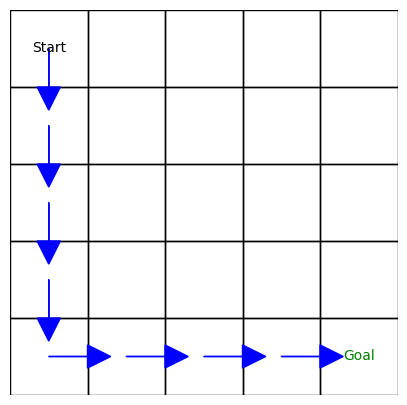

In [14]:
size = 5  # Grid size
obstacles = []  # Obstacles
gridworld = Gridworld(size, obstacles)
q_values = q_learning(gridworld, 1000, 0.1, 0.5)  # training on 1000 epochs
plot_agent_path(q_values, size, start_state=(0, 0), obstacles=obstacles)

 **Example 2** Now the agent needs to reach its goal, but there will be obstacles in its path that will result in negative rewards.

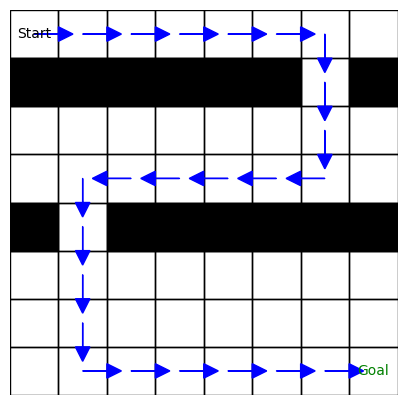

In [15]:
size = 8
obstacles = [
    (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 7),
    (4, 0), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)
]
gridworld = Gridworld(size, obstacles)
q_values = q_learning(gridworld, 1000, 0.1, 0.5)
plot_agent_path(q_values, size, start_state=(0, 0), obstacles=obstacles)

Now let's take a closer look at how this works using a small example.

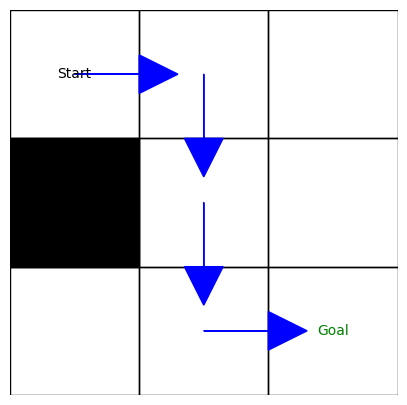

In [16]:
size = 3
obstacles = [(1, 0)]
gridworld = Gridworld(size, obstacles)
q_values = q_learning(gridworld, 1000, 0.1, 0.5)
plot_agent_path(q_values, size, start_state=(0, 0), obstacles=obstacles)

Here you can see a Q-values table for each state and action.

In [17]:
import pandas as pd

df_new = pd.DataFrame([
    {"State": str(key), "Up": round(value['up'], 3), "Down": round(value['down'], 3), "Left": round(value['left'], 3), "Right": round(value['right'], 3)}
    for key, value in q_values.items()
])

df_new

,State,Up,Down,Left,Right
0,"(0, 0)",0.062,0.062,0.062,0.125
1,"(0, 1)",0.125,0.250,0.062,0.250
2,"(0, 2)",0.250,0.500,0.125,0.250
3,"(1, 0)",0.060,0.227,-0.984,0.241
4,"(1, 1)",0.125,0.500,0.250,0.500
5,"(1, 2)",0.250,1.000,0.250,0.500
6,"(2, 0)",0.250,0.250,0.250,0.500
7,"(2, 1)",0.250,0.500,0.250,1.000
8,"(2, 2)",0.000,0.000,0.000,0.000


At each step, the agent calculates a value for each possible action and selects the one that it estimates will maximize the future reward.

In cell (0, 0), the maximum value obtained for the 'right' action is 0.125. In the next cell (0, 1), the maximum value is the same for the 'down' and 'right' actions. The illustration shows that in this case the agent can choose either of these two directions. The process continues in a similar manner in subsequent cells. Then we see in cells (1, 2) and (2, 1), one of the actions leads to a full reward of 1, which guides the agent to the final state more efficiently.

### Limitations of Q-learning:
- **Large state spaces**: Each state and action requires a separate cell in the Q-table, which requires a lot of memory.
- **Time to study**: It takes too much time to explore all possible states.
- **Unknown states**: Q-learning cannot handle states that were not in the training set.